# Benchmarking NumPy, ndarray, and RMatrix

In [17]:
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

In [18]:
def visualize_results(numpy_results: dict, rmatrix_results: dict):
    """
    Visualize the results of the benchmark tests.
    """
    sns.lineplot(x=numpy_results['sizes'], y=numpy_results['times'], label='NumPy')
    sns.lineplot(x=rmatrix_results['sizes'], y=rmatrix_results['times'], label='RMatrix')

    plt.xlabel('Matrix Size (n x n)')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison')

    plt.legend()
    plt.show()


def benchmark_numpy(matrix_set1: list[np.ndarray], matrix_set2: list[np.ndarray], test_function) -> dict:
    """
    Benchmark the performance of the test function for NumPy.
    """
    sizes = []
    times = []
    for i in tqdm.tqdm(range(len(matrix_set1)), desc="Benchmarking NumPy"):
        matrix1 = matrix_set1[i]
        matrix2 = matrix_set2[i]
        sizes.append(matrix1.shape[0])
        time = timeit.timeit(lambda: test_function(matrix1, matrix2), number=10) / 10
        times.append(time)

    return {'sizes': sizes, 'times': times}

def benchmark_rmatrix() -> dict:
    """
    Benchmark the performance of the test function for RMatrix.
    """
    return {'sizes': [], 'times': []}


In [19]:
seed = 42
np.random.seed(seed)

def generate_matrix_set(n_start: int, n_end: int) -> list[np.ndarray]:
    """
    Generate a set of random matrices of size n x n where n_start <= n <= n_end
    """
    return [np.random.rand(n, n) for n in range(n_start, n_end + 1)]

In [20]:
matrix_set1 = generate_matrix_set(10, 1000)
matrix_set2 = generate_matrix_set(10, 1000)

## Addition

Benchmarking NumPy: 100%|██████████| 991/991 [00:01<00:00, 871.91it/s] 


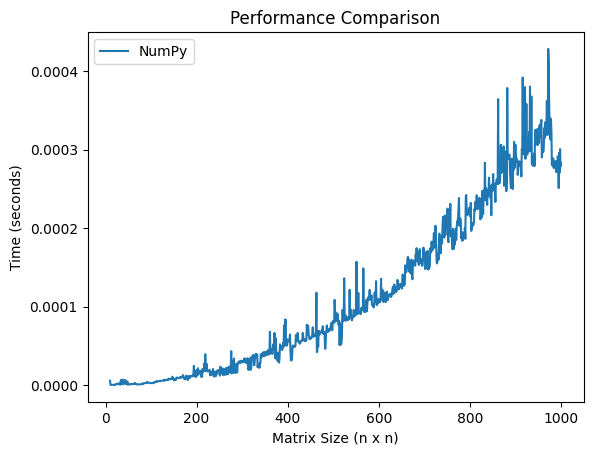

In [21]:
def add(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    return matrix1 + matrix2

numpy_results = benchmark_numpy(matrix_set1, matrix_set2, add)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)

## Subtraction

Benchmarking NumPy: 100%|██████████| 991/991 [00:00<00:00, 1380.60it/s]


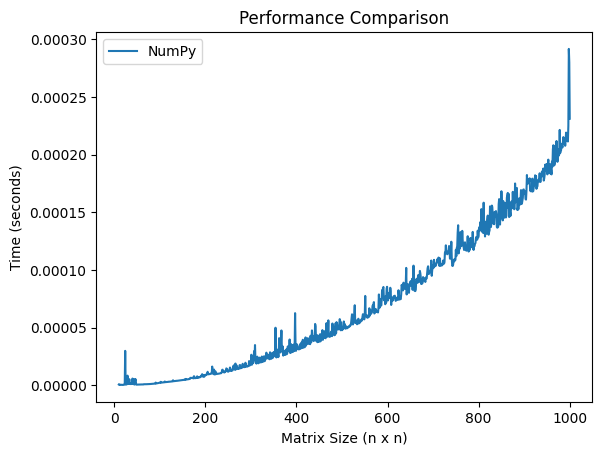

In [22]:
def subtract(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    return matrix1 - matrix2

numpy_results = benchmark_numpy(matrix_set1, matrix_set2, subtract)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)

## Matrix Multiplication

Benchmarking NumPy: 100%|██████████| 991/991 [00:12<00:00, 77.46it/s]  


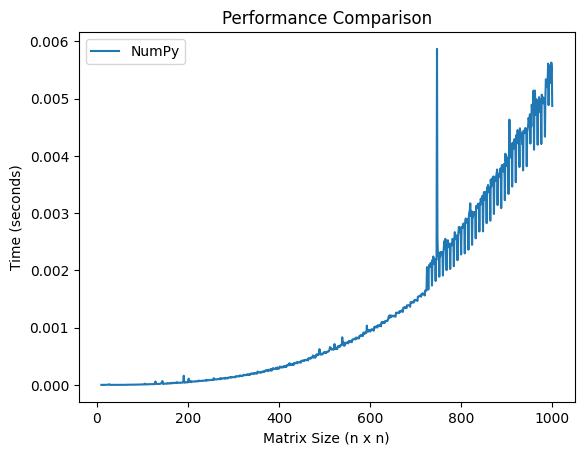

In [23]:
def multiply(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    return matrix1 @ matrix2

numpy_results = benchmark_numpy(matrix_set1, matrix_set2, multiply)
rmatrix_results = benchmark_rmatrix()

visualize_results(numpy_results, rmatrix_results)

## Scalar Multiplication

## Transpose